In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE

sys.path.insert(0, '../src/data')
sys.path.insert(0, '../src/features')
sys.path.insert(0, '../src/models')
sys.path.insert(0, '../src/visualization')

from data_manager import DataManager

from ada_boost import AdaBoost
from decision_tree import DecisionTree
from k_means import KMeans
from svm import Svm
from neural_network import NeuralNetwork
from perceptron import Perceptron

import tqdm

In [22]:
raw_path = '../data/raw/train.csv'
rawDataset = DataManager(raw_path, "Raw dataser")

## Feature Selection

In [23]:
def plot_rfe(estimator):
    # Supposition que la fonction manage_data renvoie les bons ensembles de données
    max_accuracy = 0
    max_features = 0
    accuracies = []
    nb_features = rawDataset.constants.get_n_features()

    for i in tqdm.tqdm(range(nb_features, 9, -20)):
        # Appliquer RFE
        selector = RFE(estimator, n_features_to_select=i, step=1)
        selector = selector.fit(rawDataset.x_train, rawDataset.t_train)
        
        # Transformer les caractéristiques d'entraînement et de test
        x_train_selected = selector.transform(rawDataset.x_train)
        x_test_selected = selector.transform(rawDataset.x_test)
        
        # Entraîner le modèle et évaluer la précision sur l'ensemble de test
        estimator.fit(x_train_selected, rawDataset.t_train)
        accuracy = estimator.score(x_test_selected, rawDataset.t_test)
        accuracies.append(accuracy)
        
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            max_features = i

    # Plot the graph
    plt.plot(range(nb_features, 9, -20), accuracies)
    plt.xlabel('Number of features')
    plt.ylabel('Test accuracy')
    plt.title(f'Accuracy vs Number of features ({estimator.__class__.__name__})')
    plt.annotate(f'Max Accuracy: {max_accuracy}\nNumber of Features: {max_features}', xy=(max_features, max_accuracy), xytext=(max_features, max_accuracy + 0.05),
                arrowprops=dict(facecolor='black', arrowstyle='->'))
    filename = f"{estimator.__class__.__name__}_RFE"
    plt.savefig("../graphs/"+ filename)
    plt.show()

In [24]:
PerceptronModel = Perceptron()
NeuralNetworkModel = NeuralNetwork()
AdaBoostModel = AdaBoost()
SvmModel = Svm()
DecisionTreeModel = DecisionTree()
KMeansModel = KMeans(rawDataset.constants.get_n_labels())

models = [PerceptronModel, NeuralNetworkModel, AdaBoostModel, SvmModel, DecisionTreeModel, KMeansModel]

In [6]:
for model in models:
	plot_rfe(model)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [05:45<00:00, 34.51s/it]


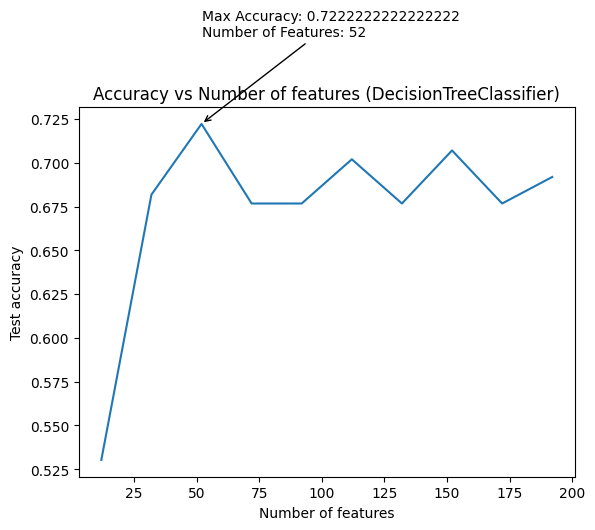

 50%|█████     | 5/10 [01:24<01:37, 19.56s/it]

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
 
classifiers = [
    DecisionTreeClassifier(),
    Perceptron(),
    MLPClassifier(),
    AdaBoostClassifier(),
    SVC(probability=True),
    KMeans(n_clusters=99)
]
 
 
for classifier in classifiers:
    plot_rfe(classifier)